In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def inform(c):
    z = sympy.symbols('z', imaginary=True)
    
    eq = sympy.Eq(z, z ** 2 + c)
    sols = sympy.solveset(eq, z)
    
    for i, zi in enumerate(sols):
        print('Point No{}: {}'.format(i, zi))
        
        zmodule = abs(sympy.diff(z**2 + c, z).subs(z, zi))
        if zmodule < 1:
            type_point = 'притягуюча'
        elif zmodule > 1:
            type_point = 'відштовхуюча'
        else:
            type_point = 'нейтральна'
        
        print('Характер нерухомої точки: {}\n'.format(type_point))

In [3]:
def julia(c, cxpoint = 0, cypoint = 0, zoom = 1, xpoints = 2000, 
         ypoints = 2000, max_iterations = 50, infinity_border = 4, use_k = True):
    
    xmin = cxpoint - 1.5 * zoom
    xmax = cxpoint + 1.5 * zoom
    
    ymin = cypoint - 1.5 * zoom
    ymax = cypoint + 1.5 * zoom
    
    image = np.zeros((xpoints, ypoints))
    x, y = np.mgrid[xmin:xmax:(xpoints*1j), ymin:ymax:(ypoints*1j)]
    
    z = x + 1j * y
    for k in range(max_iterations):
        z = z**2 + c
        mask = (np.abs(z) > infinity_border) & (image == 0)
        
        image[mask] = k if use_k else 1
        z[mask] = np.nan
        
    return -image.T

In [4]:
#c = 0.31 + 1j * (0.4)
#c = -0.11 + 1j * (0.6557)
#c = -0.12 + 1j * (0.74)
#c = -0.194 + 1j * (0.6557)
c = -0.74543 + 1j * (0.11301)
#c = -1.25
#c = -0.481762 + 1j * (-0.531657)
#c = -0.39054 + 1j * (-0.58579)
#c = -0.15652 + 1j * (-1.03225)
#c = 0.11031 + 1j * (-0.67037)

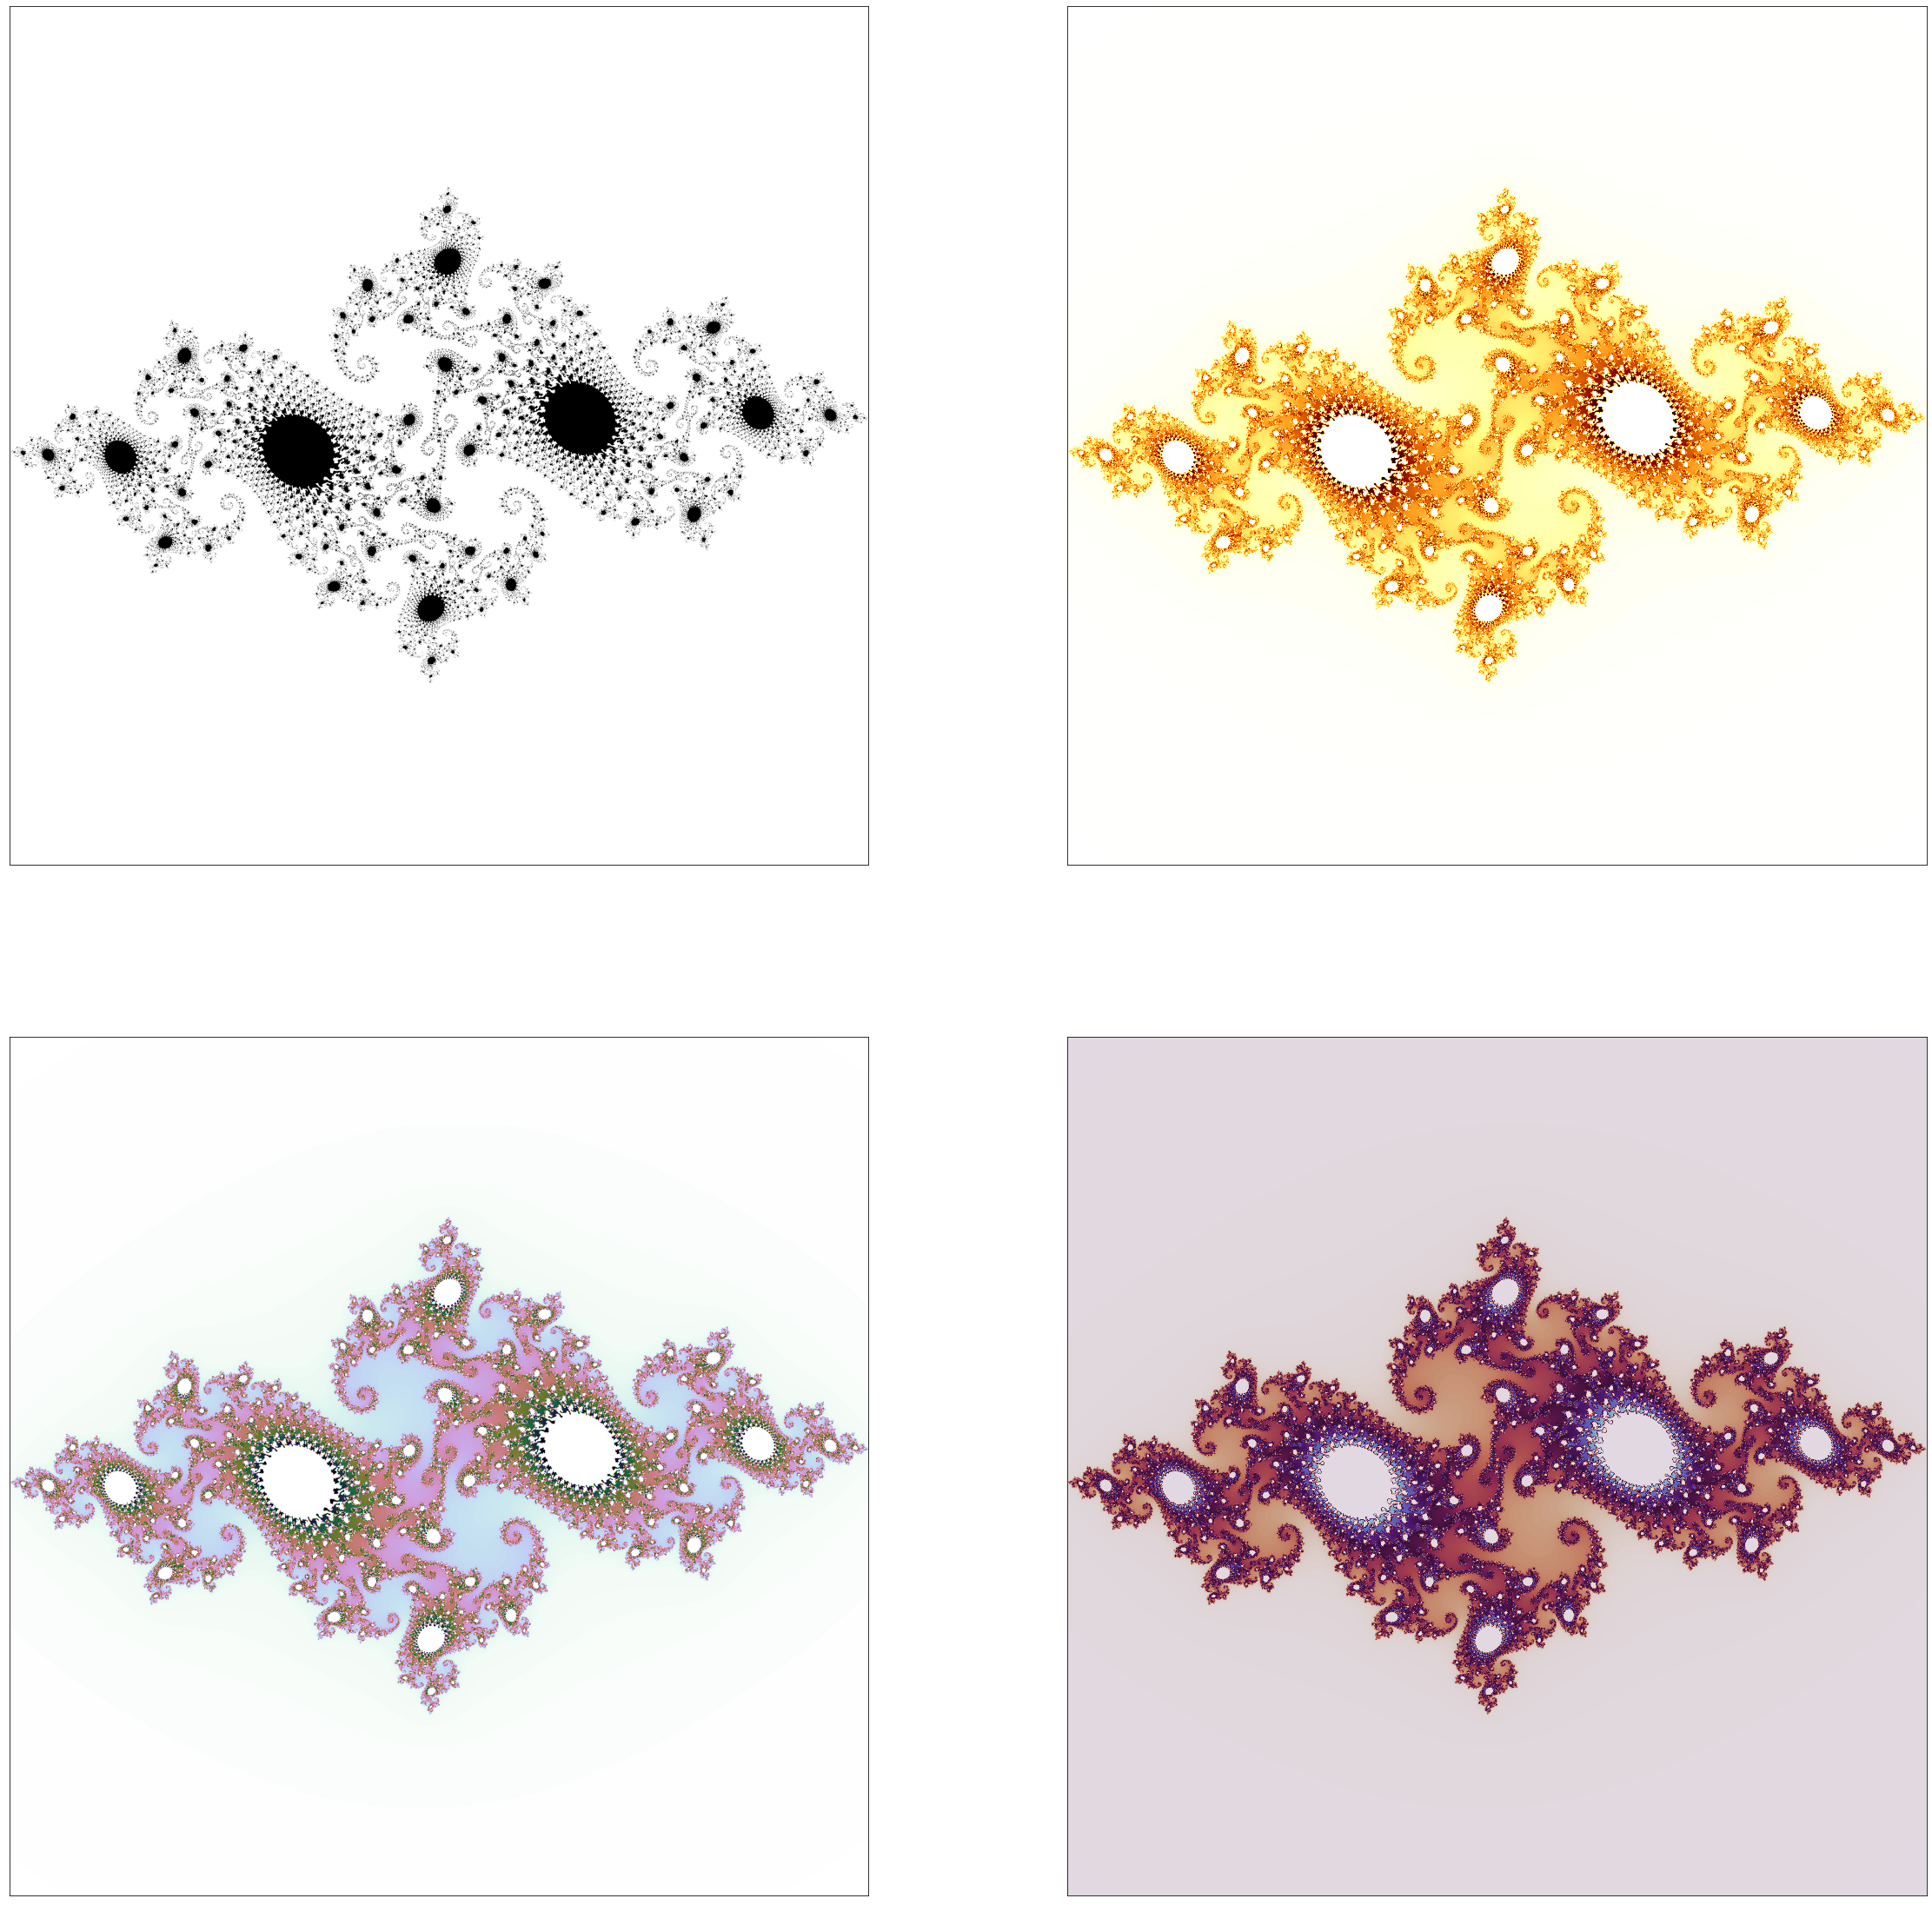

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(40,40))

inform(c)
image = julia(c,  max_iterations = 200, use_k = False)
axes[0, 0].imshow(image, cmap='Greys')

image = julia(c, max_iterations = 200)
axes[0, 1].imshow(image, cmap='afmhot')
axes[1, 0].imshow(image, cmap='cubehelix')
axes[1, 1].imshow(image, cmap='twilight')

for i in range(2):
    for j in range(2):
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

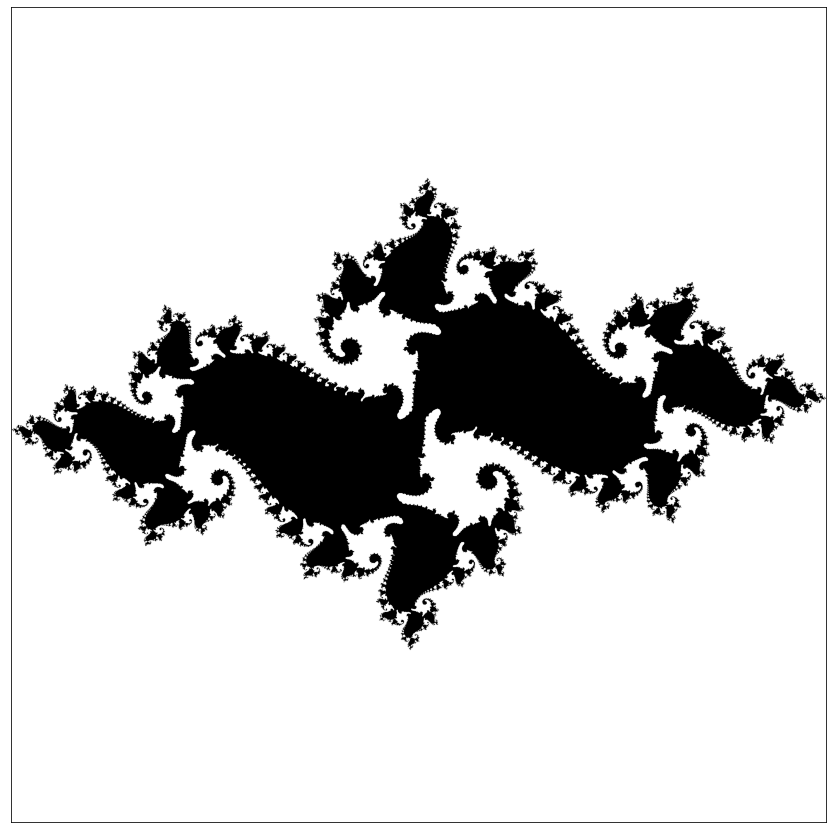

In [6]:
plt.figure(figsize=(15, 15))

inform(c)
image = julia(c, use_k = False)

plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap='Greys')

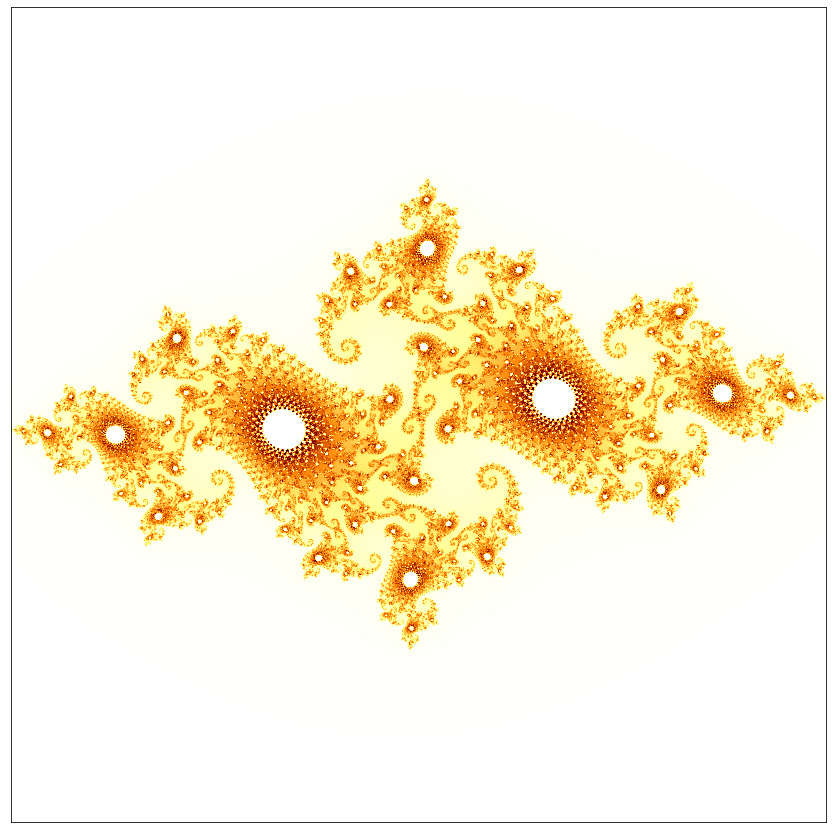

In [7]:
plt.figure(figsize=(15, 15))

inform(c)
image = julia(c, max_iterations = 300)

plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap='afmhot')